## Studying Titanic Kernels - Last Copy

---

### Contents

1. Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Predictive Modeling

## 1. Exploratory Data Analysis

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

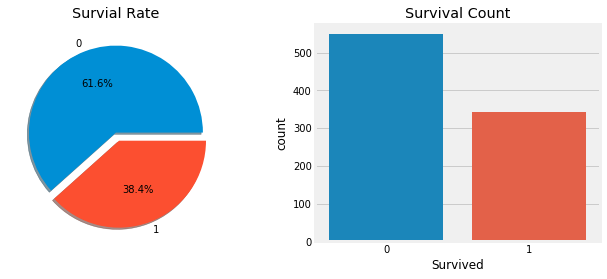

In [4]:
fig, ax = plt.subplots(1, 2 ,figsize=(10, 4))

data.Survived.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survial Rate')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survival Count')

plt.show()

### Types of Features

1. Categorical Features : Sex, Embarked
2. Oridinal Features : Pclass
3. Continuous Features : Age, Fare...

## Analysis with Sex(Gender)

In [5]:
data.groupby(['Sex', 'Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

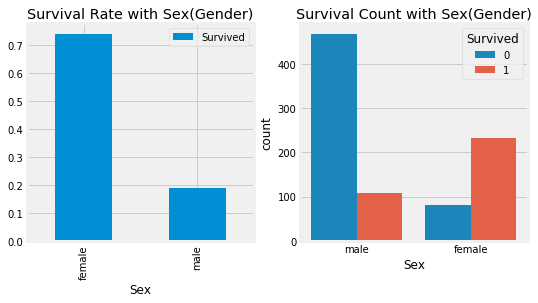

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rate with Sex(Gender)')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survival Count with Sex(Gender)')

plt.show()

## Analysis with Pclass

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


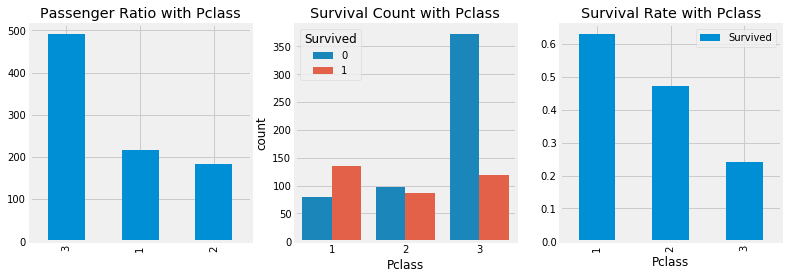

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

data.Pclass.value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Passenger Ratio with Pclass')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survival Count with Pclass')

'''
sns.barplot('Pclass', 'Survived', data=data, ax=ax[2])
ax[2].set_title('Survival Rate with Pclass')
'''

data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar(ax=ax[2])
ax[2].set_title('Survival Rate with Pclass')

plt.show()

In [9]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

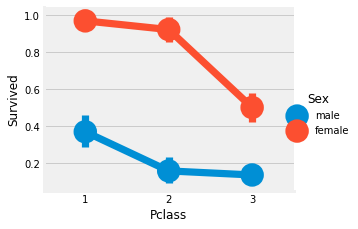

In [10]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

## Analysis with Age

In [11]:
print('The oldest passenger was {} years old'.format(data.Age.max()))
print('The youngest passenger was {} years old'.format(data.Age.min()))
print('The average age of the passengers was {} years old'.format(data.Age.mean()))

The oldest passenger was 80.0 years old
The youngest passenger was 0.42 years old
The average age of the passengers was 29.69911764705882 years old


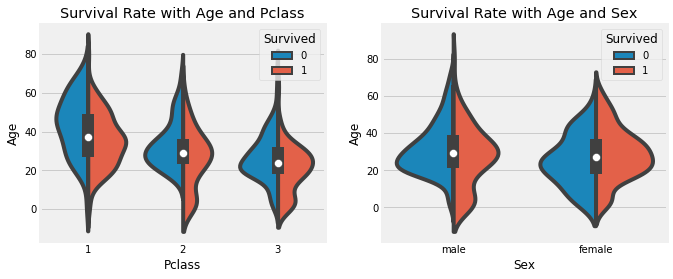

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Survival Rate with Age and Pclass')

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Survival Rate with Age and Sex')

plt.show()

In [0]:
data['Initial'] = 0
for p in data:
  data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data.Sex, data.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
data.Initial.replace(
  ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Capt', 'Sir', 'Don', 'Lady', 'Countess', 'Jonkheer', 'Rev', 'Col'],
  ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other'],
  inplace=True
)

In [16]:
data.groupby('Initial').Age.mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [0]:
data.loc[(data.Initial=='Master')&(data.Age.isnull()), 'Age'] = 5
data.loc[(data.Initial=='Miss')&(data.Age.isnull()), 'Age'] = 22
data.loc[(data.Initial=='Mr')&(data.Age.isnull()), 'Age'] = 33
data.loc[(data.Initial=='Mrs')&(data.Age.isnull()), 'Age'] = 36
data.loc[(data.Initial=='Other')&(data.Age.isnull()), 'Age'] = 46

In [18]:
data.Age.isnull().any()

False

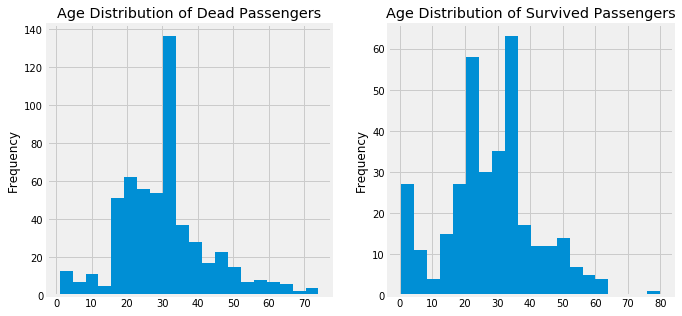

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

data[data.Survived==0].Age.plot.hist(ax=ax[0], bins=20)
ax[0].set_title('Age Distribution of Dead Passengers')

data[data.Survived==1].Age.plot.hist(ax=ax[1], bins=20)
ax[1].set_title('Age Distribution of Survived Passengers')

plt.show()

## Analysis with Embarked

In [20]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

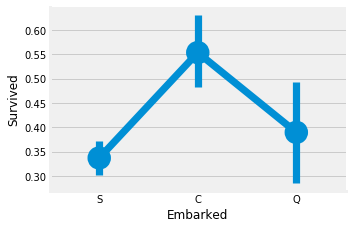

In [21]:
sns.factorplot('Embarked', 'Survived', data=data)

fig = plt.gcf()
fig.set_size_inches(5, 3)

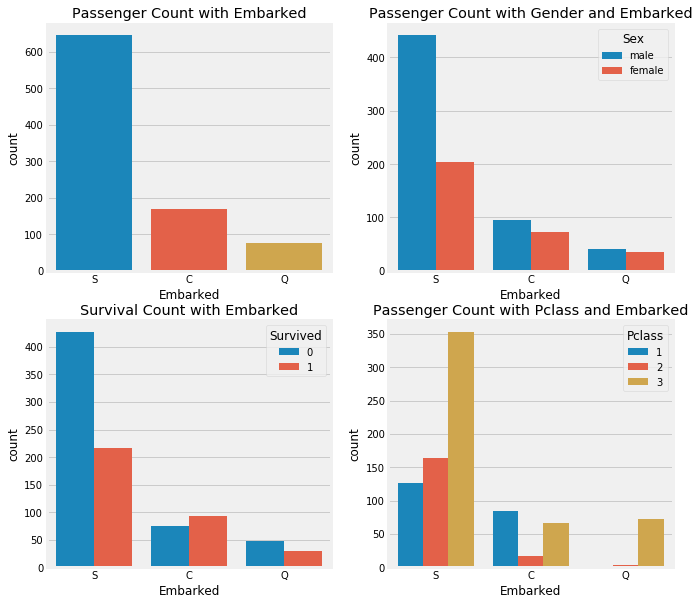

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Passenger Count with Embarked')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Passenger Count with Gender and Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Survival Count with Embarked')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Passenger Count with Pclass and Embarked')

plt.show()

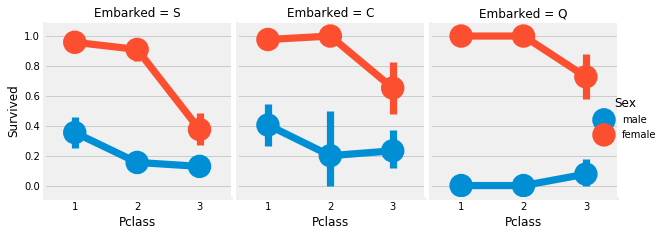

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

fig = plt.gcf()
fig.set_size_inches(9, 3)
plt.show()

In [24]:
data.Embarked.fillna('S', inplace=True)
data.Embarked.isnull().any()

False

## Analysis with SibSp

In [25]:
pd.crosstab(data.SibSp, data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


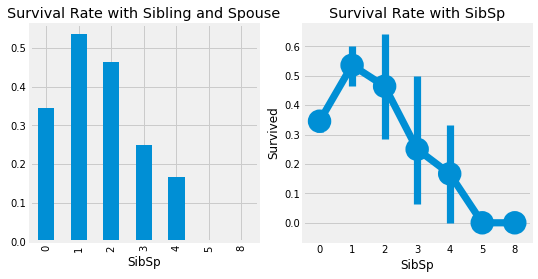

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

data[['SibSp', 'Survived']].groupby('SibSp').Survived.mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rate with Sibling and Spouse')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survival Rate with SibSp')

plt.close(2)
plt.show()

In [27]:
pd.crosstab(data.SibSp, data.Pclass, margins=True)

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


## Analysis with Parch

In [28]:
pd.crosstab(data.Parch, data.Survived, margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


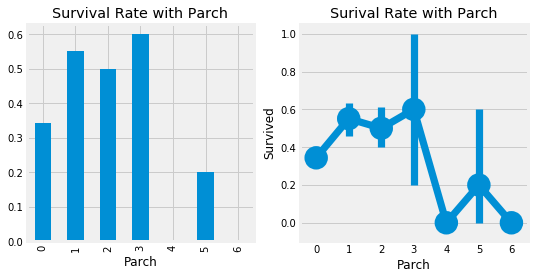

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

data[['Parch', 'Survived']].groupby('Parch').Survived.mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rate with Parch')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Surival Rate with Parch')

plt.close(2)
plt.show()

## Analysis with Fare

In [30]:
print('The highest fare was : {}'.format(data.Fare.max()))
print('The lowest fare was : {}'.format(data.Fare.min()))
print('The average fare was : {}'.format(data.Fare.mean()))

The highest fare was : 512.3292
The lowest fare was : 0.0
The average fare was : 32.2042079685746


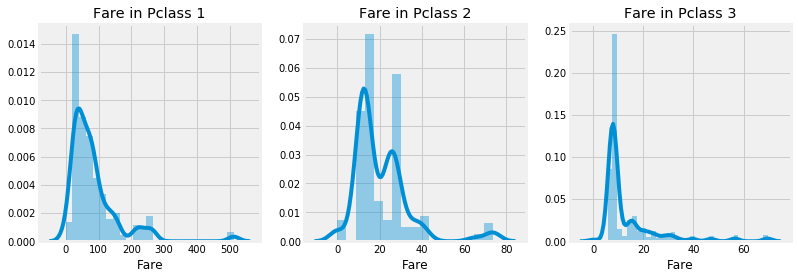

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.distplot(data[data.Pclass==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(data[data.Pclass==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')

sns.distplot(data[data.Pclass==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

## Overall Observations

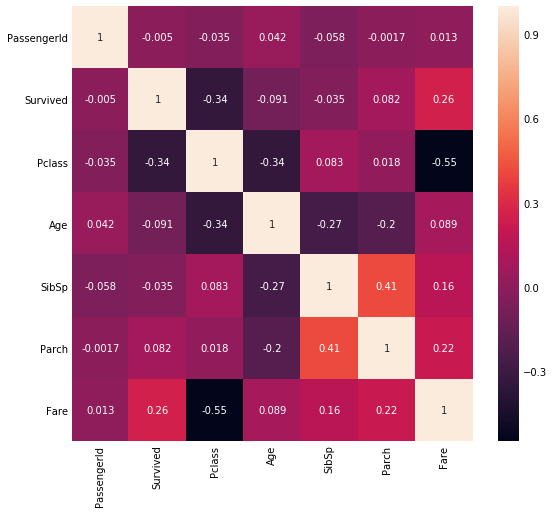

In [32]:
sns.heatmap(data.corr(), annot=True)

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

## Feature Engineering and Data Cleansing

### 1. Age band

In [33]:
data['Age_band'] = 0

data.loc[data.Age <= 16, 'Age_band'] = 0
data.loc[(data.Age > 16) & (data.Age <= 32), 'Age_band'] = 1
data.loc[(data.Age > 32) & (data.Age <= 48), 'Age_band'] = 2
data.loc[(data.Age > 48) & (data.Age <= 64), 'Age_band'] = 3
data.loc[data.Age > 64, 'Age_band'] = 4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [34]:
data.Age_band.value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


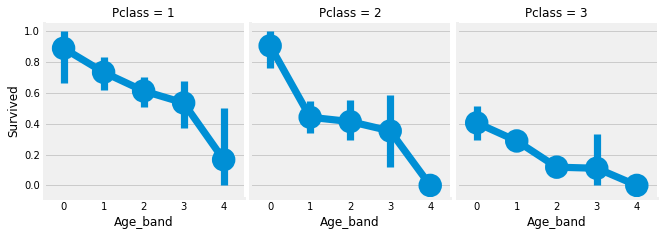

In [35]:
sns.factorplot('Age_band', 'Survived', col='Pclass', data=data)

fig = plt.gcf()
fig.set_size_inches(9, 3)
plt.show()

### 2. Family Size and Alone

In [0]:
data['Family_size'] = 0
data['Family_size'] = data['SibSp'] + data['Parch']

data['Alone'] = 0
data.loc[data.Family_size==0, 'Alone'] = 1

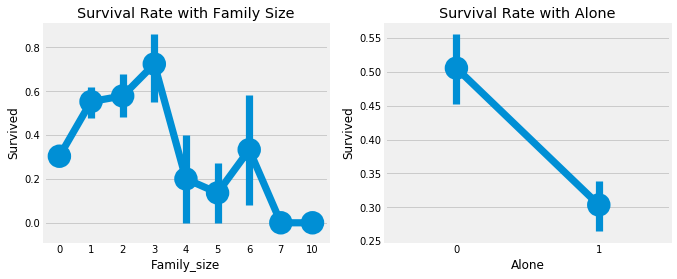

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.factorplot('Family_size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Survival Rate with Family Size')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survival Rate with Alone')

plt.close(2)
plt.close(3)
plt.show()

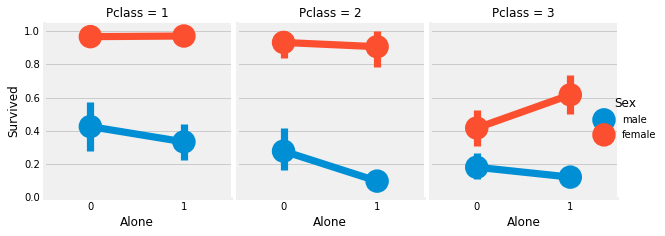

In [38]:
sns.factorplot('Alone', 'Survived', hue='Sex', col='Pclass', data=data)

fig = plt.gcf()
fig.set_size_inches(9, 3)
plt.show()

### 3. Fare Range

In [39]:
data['Fare_range'] = pd.qcut(data.Fare, 4)
data.groupby('Fare_range').Survived.mean().to_frame()

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [0]:
data['Fare_cat'] = 0

data.loc[data.Fare <= 7.91, 'Fare_cat'] = 0
data.loc[(data.Fare > 7.91) & (data.Fare <= 14.454), 'Fare_cat'] = 1
data.loc[(data.Fare > 14.454) & (data.Fare <= 31.0), 'Fare_cat'] = 2
data.loc[data.Fare > 31.0, 'Fare_cat'] = 3

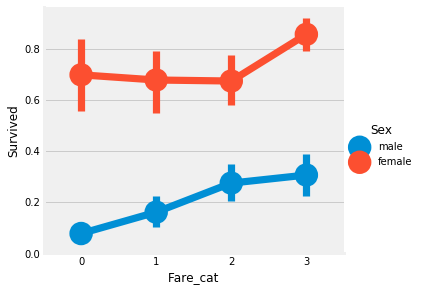

In [41]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex', data=data)

fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.show()

### Converting String Values into Number Values

In [0]:
data.Sex.replace(['male', 'female'], [0, 1], inplace=True)
data.Embarked.replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data.Initial.replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

### Dropping Unrequired Features

In [0]:
data.drop(['Name', 'Age', 'Ticket', 'Cabin', 'Fare', 'Fare_range', 'PassengerId'], axis=1, inplace=True)

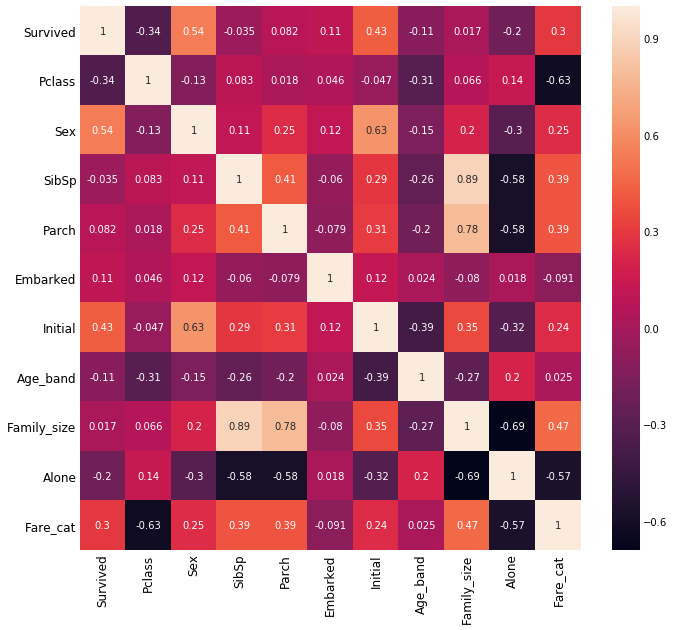

In [44]:
sns.heatmap(data.corr(), annot=True)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Predictive Modeling

1. Logistic Regression
2. KNN
3. Decision Tree
4. Random Forest
5. Gaussian Naive Bayes
6. Support Vector Machine

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data.Survived)
train_X = train[train.columns[1:]]
train_y = train.Survived
test_X = test[test.columns[1:]]
test_y = test.Survived

### SVM (Linear, RBF)

In [46]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.8171641791044776


In [47]:
model = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.832089552238806


### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.8171641791044776


### K Nearest Neighbors (KNN)

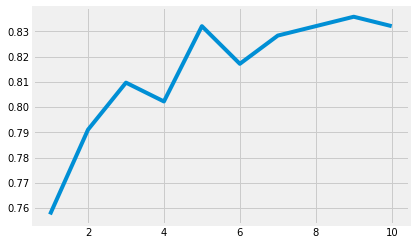

Maximum Accuracy : 0.835820895522388


In [49]:
from sklearn.neighbors import KNeighborsClassifier

acc = pd.Series()

for n in range(1, 11):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(train_X, train_y)
  preds = model.predict(test_X)
  acc = acc.append(pd.Series(metrics.accuracy_score(preds, test_y)))
  
plt.plot(list(range(1, 11, 1)), acc)
plt.show()
print('Maximum Accuracy : {}'.format(acc.max()))

### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.8134328358208955


### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.8097014925373134


### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.7947761194029851


## Cross Validation

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=0)
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

X = data[data.columns[1:]]
y = data.Survived
avg, std, acc = [], [], []

for model in models:
  cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  avg.append(cv_result.mean())
  std.append(cv_result.std())
  acc.append(cv_result)
  
models_df = pd.DataFrame({'CV_mean':avg, 'Std':std}, index=classifiers)
models_df

,CV_mean,Std
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.807016,0.030834
Random Forest,0.809226,0.039437
Naive Bayes,0.801386,0.028999


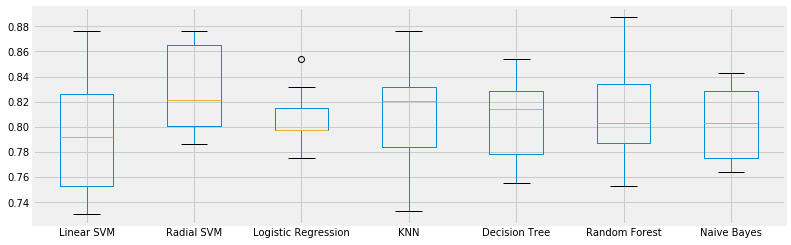

In [54]:
fig, ax = plt.subplots(figsize=(12, 4))

box = pd.DataFrame(acc, index=classifiers)
box.T.boxplot()
plt.show()

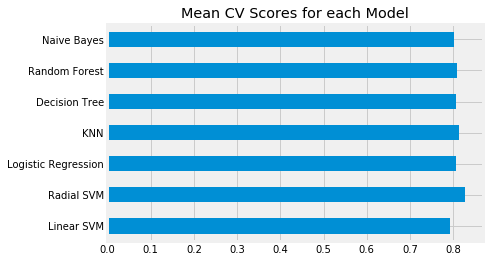

In [55]:
models_df['CV_mean'].plot.barh()

plt.title('Mean CV Scores for each Model')
plt.show()

## Confusion Matrix

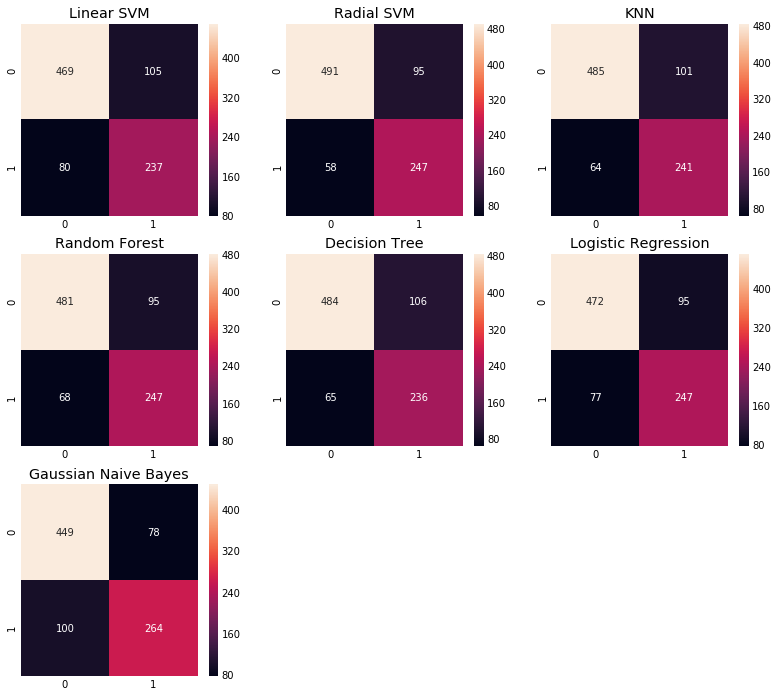

In [56]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

preds = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(preds, y), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Linear SVM')

preds = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(preds, y), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Radial SVM')

preds = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv=10)
sns.heatmap(confusion_matrix(preds, y), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('KNN')

preds = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv=10)
sns.heatmap(confusion_matrix(preds, y), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Random Forest')

preds = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
sns.heatmap(confusion_matrix(preds, y), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Decision Tree')

preds = cross_val_predict(LogisticRegression(), X, y, cv=10)
sns.heatmap(confusion_matrix(preds, y), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Logistic Regression')

preds = cross_val_predict(GaussianNB(), X, y, cv=10)
sns.heatmap(confusion_matrix(preds, y), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Gaussian Naive Bayes')

fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 2])
plt.show()

## Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 242 candidates, totalling 726 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 726 out of 726 | elapsed:   12.2s finished


In [58]:
n_estimators = list(range(100, 1100, 100))
hyper = {'n_estimators':n_estimators}

gd = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   15.5s finished


0.819304152637486
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Ensembling

### Voting Classifier

In [59]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
  estimators = [
      ('KNN', KNeighborsClassifier(n_neighbors=9)),
      ('RBF', svm.SVC(kernel='rbf', C=0.5, gamma=0.1, probability=True)),
      ('LIN', svm.SVC(kernel='linear', probability=True)),
      ('LR', LogisticRegression(C=0.05)),
      ('DTC', DecisionTreeClassifier(random_state=0)),
      ('GNB', GaussianNB()),
      ('RFR', RandomForestClassifier(n_estimators=200, random_state=0))
  ], voting='soft'
).fit(train_X, train_y)

print('Accuracy : {}'.format(ensemble.score(test_X, test_y)))

cvScore = cross_val_score(ensemble, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score : {}'.format(cvScore.mean()))

Accuracy : 0.8208955223880597
Cross Validation Score : 0.8226676881171263


### Bagging Classifier (Bootstrap Aggregating)

In [60]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

cvScore = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('Cross Validation Accuracy : {}'.format(cvScore.mean()))

Accuracy : 0.835820895522388
Cross Validation Accuracy : 0.8148893428668709


### Boosting Classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
cvScore = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score : {}'.format(cvScore.mean()))

Cross Validation Score : 0.8249526160481218


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
cvScore = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score : {}'.format(cvScore.mean()))

Cross Validation Score : 0.8182862331176939


In [65]:
import xgboost as xg

model = xg.XGBClassifier(n_estimators=900, random_state=0, learning_rate=0.1)
cvScore = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score : {}'.format(cvScore.mean()))

Cross Validation Score : 0.8104710021563954


In [66]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learning_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:  3.5min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


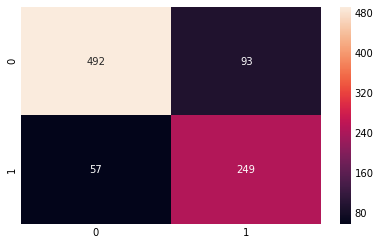

In [67]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)

cvPredict = cross_val_predict(ada, X, y, cv=10)
sns.heatmap(confusion_matrix(cvPredict, y), annot=True, fmt='2.0f')
plt.show()

In [68]:
cvScore = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print('Final Cross Validation Score : {}'.format(cvScore.mean()))

Final Cross Validation Score : 0.8316317671092953


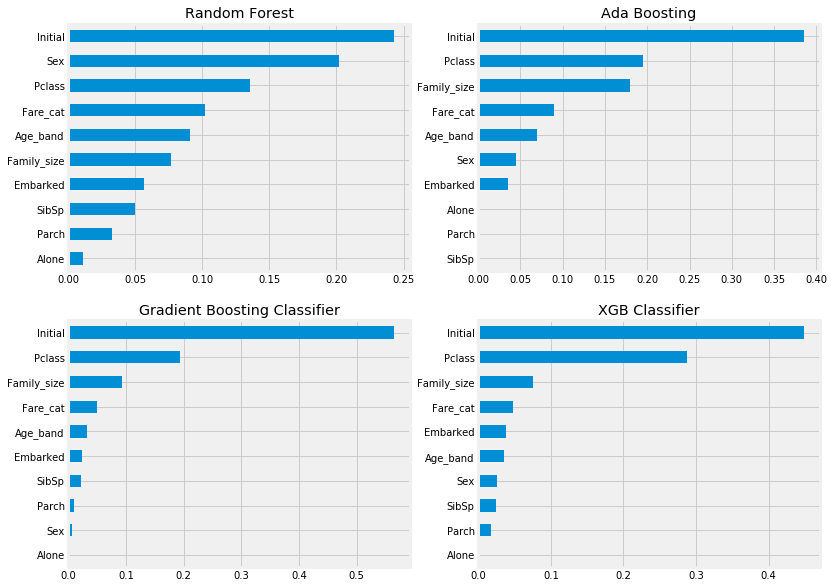

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(ax=ax[0, 0])
ax[0, 0].set_title('Random Forest')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(ax=ax[0, 1])
ax[0, 1].set_title('Ada Boosting')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(ax=ax[1, 0])
ax[1, 0].set_title('Gradient Boosting Classifier')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(ax=ax[1, 1])
ax[1, 1].set_title('XGB Classifier')

plt.show()